# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("../../train.csv")
df.head()

,Id,description,medical_specialty,sample_name,transcription
0,1,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"HISTORY OF PRESENT ILLNESS: , The patient is a..."
1,2,The patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,Pericardial Effusion,"REASON FOR CONSULTATION:, Pericardial effusio..."
2,3,Hand dermatitis.,Dermatology,Dermatitis - SOAP,"SUBJECTIVE:, This is a 29-year-old Vietnamese..."
3,4,Recurrent degenerative spondylolisthesis and ...,Surgery,Lumbar Re-exploration,"PREOPERATIVE DIAGNOSIS: , Recurrent degenerati..."
4,5,Chiropractic IME with old files review. Deta...,IME-QME-Work Comp etc.,Chiropractic IME - 2,"DATE OF INJURY : October 4, 2000,DATE OF EXAMI..."


# EDA and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 3384 non-null   int64 
 1   description        3384 non-null   object
 2   medical_specialty  3384 non-null   object
 3   sample_name        3384 non-null   object
 4   transcription      3360 non-null   object
dtypes: int64(1), object(4)
memory usage: 132.3+ KB


In [4]:
df.isnull().sum()

Id                    0
description           0
medical_specialty     0
sample_name           0
transcription        24
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Id                   0
description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [7]:
df.head()

,Id,description,medical_specialty,sample_name,transcription
0,1,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"HISTORY OF PRESENT ILLNESS: , The patient is a..."
1,2,The patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,Pericardial Effusion,"REASON FOR CONSULTATION:, Pericardial effusio..."
2,3,Hand dermatitis.,Dermatology,Dermatitis - SOAP,"SUBJECTIVE:, This is a 29-year-old Vietnamese..."
3,4,Recurrent degenerative spondylolisthesis and ...,Surgery,Lumbar Re-exploration,"PREOPERATIVE DIAGNOSIS: , Recurrent degenerati..."
4,5,Chiropractic IME with old files review. Deta...,IME-QME-Work Comp etc.,Chiropractic IME - 2,"DATE OF INJURY : October 4, 2000,DATE OF EXAMI..."


In [8]:
df.head()

,Id,description,medical_specialty,sample_name,transcription
0,1,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"HISTORY OF PRESENT ILLNESS: , The patient is a..."
1,2,The patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,Pericardial Effusion,"REASON FOR CONSULTATION:, Pericardial effusio..."
2,3,Hand dermatitis.,Dermatology,Dermatitis - SOAP,"SUBJECTIVE:, This is a 29-year-old Vietnamese..."
3,4,Recurrent degenerative spondylolisthesis and ...,Surgery,Lumbar Re-exploration,"PREOPERATIVE DIAGNOSIS: , Recurrent degenerati..."
4,5,Chiropractic IME with old files review. Deta...,IME-QME-Work Comp etc.,Chiropractic IME - 2,"DATE OF INJURY : October 4, 2000,DATE OF EXAMI..."


In [9]:
df.shape

(3360, 5)

In [10]:
df['medical_specialty'].unique()

array([' Cardiovascular / Pulmonary', ' Dermatology', ' Surgery',
       ' IME-QME-Work Comp etc.', ' General Medicine', ' Orthopedic',
       ' Gastroenterology', ' Pain Management',
       ' Consult - History and Phy.', ' Radiology',
       ' Hematology - Oncology', ' Neurology', ' Nephrology', ' Podiatry',
       ' Office Notes', ' Rheumatology', ' Neurosurgery',
       ' Endocrinology', ' Discharge Summary', ' Bariatrics',
       ' SOAP / Chart / Progress Notes', ' ENT - Otolaryngology',
       ' Ophthalmology', ' Letters', ' Cosmetic / Plastic Surgery',
       ' Dentistry', ' Physical Medicine - Rehab',
       ' Psychiatry / Psychology', ' Autopsy', ' Sleep Medicine',
       ' Speech - Language', ' Allergy / Immunology',
       ' Lab Medicine - Pathology', ' Chiropractic', ' SCARF type'],
      dtype=object)

In [11]:
# How many classes?

len(df['medical_specialty'].unique())

35

In [12]:
# How many examples of each classes?
df.medical_specialty.value_counts()

medical_specialty
 Surgery                          775
 Consult - History and Phy.       310
 Cardiovascular / Pulmonary       308
 Orthopedic                       294
 Radiology                        225
 General Medicine                 188
 Gastroenterology                 183
 Neurology                        166
 SOAP / Chart / Progress Notes    130
 ENT - Otolaryngology              77
 Discharge Summary                 75
 Neurosurgery                      73
 Hematology - Oncology             72
 Nephrology                        69
 Ophthalmology                     64
 Pain Management                   54
 Podiatry                          43
 Office Notes                      34
 Dermatology                       23
 Psychiatry / Psychology           22
 Dentistry                         21
 Cosmetic / Plastic Surgery        19
 Letters                           18
 Physical Medicine - Rehab         17
 Sleep Medicine                    17
 Endocrinology                  

In [13]:
import pandas as pd

# df is your DataFrame and 'medical_specialty' is the column containing the target classes
top_classes = df['medical_specialty'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the rows with the top 10 classes
df = df[df['medical_specialty'].isin(top_classes)]

<Axes: xlabel='medical_specialty'>

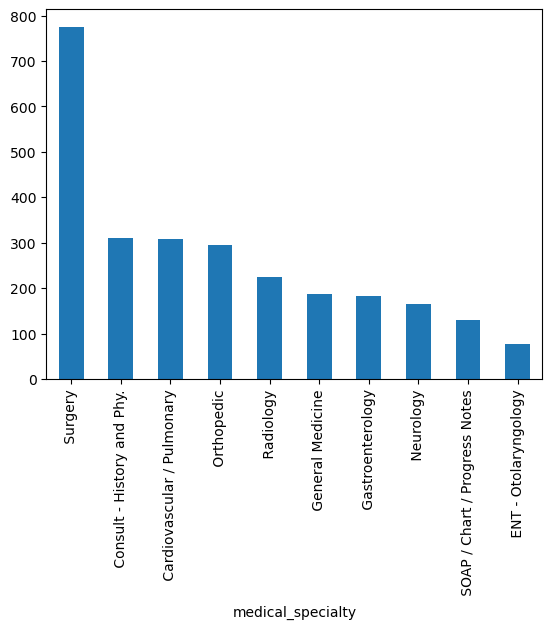

In [14]:
df['medical_specialty'].value_counts().plot(kind='bar')

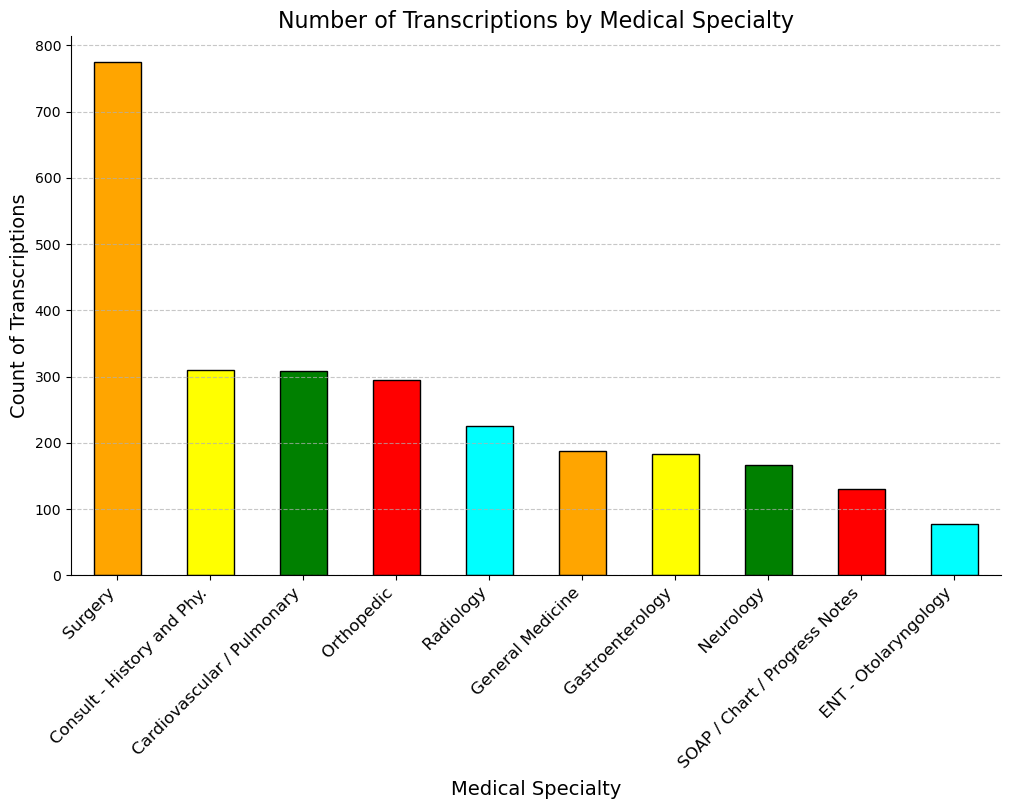

In [15]:
ms = df['medical_specialty'].value_counts()
colors = ['orange', 'yellow', 'green', 'red', 'cyan']

# Plotting the bar chart
plt.figure(figsize=(12, 7))
ms.plot(kind='bar', color=colors, edgecolor='black')

# Adding titles and labels with better font sizes
plt.title("Number of Transcriptions by Medical Specialty", fontsize=16)
plt.ylabel('Count of Transcriptions', fontsize=14)
plt.xlabel('Medical Specialty', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Removing top and right spines for cleaner plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

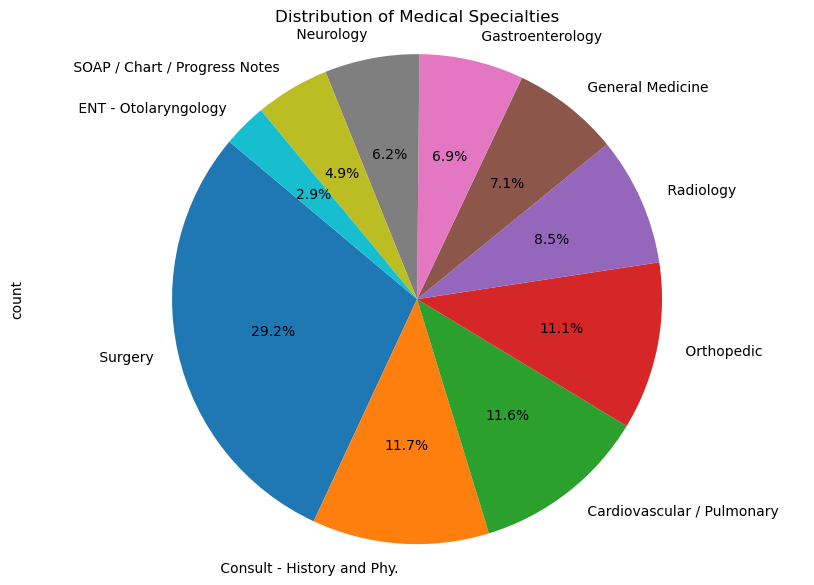

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# df is your DataFrame and 'medical_specialty' is one of its columns
ms = df['medical_specialty'].value_counts()

# Plotting
plt.figure(figsize=(10, 7))
ms.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Adding title
plt.title("Distribution of Medical Specialties")

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [17]:
df.dtypes

Id                    int64
description          object
medical_specialty    object
sample_name          object
transcription        object
dtype: object

In [18]:
encoder = LabelEncoder()
df['medical_specs_encoded'] = encoder.fit_transform(df['medical_specialty'])
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"HISTORY OF PRESENT ILLNESS: , The patient is a...",0
1,2,The patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,Pericardial Effusion,"REASON FOR CONSULTATION:, Pericardial effusio...",0
3,4,Recurrent degenerative spondylolisthesis and ...,Surgery,Lumbar Re-exploration,"PREOPERATIVE DIAGNOSIS: , Recurrent degenerati...",9
5,6,Patient with swelling of lips and dysphagia a...,General Medicine,Gen Med Consult - 5,"CHIEF COMPLAINT: , Swelling of lips causing di...",4
6,7,Repeat irrigation and debridement of Right di...,Orthopedic,Subperiosteal Abscess Debridement,"PREOPERATIVE DIAGNOSIS: , Right distal femoral...",6


# Cleaning the text

## Lower case all text

In [19]:
import re

In [20]:
def lower(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : str.lower(x))
    return df
df = lower(df,'transcription')
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"history of present illness: , the patient is a...",0
1,2,The patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,Pericardial Effusion,"reason for consultation:, pericardial effusio...",0
3,4,Recurrent degenerative spondylolisthesis and ...,Surgery,Lumbar Re-exploration,"preoperative diagnosis: , recurrent degenerati...",9
5,6,Patient with swelling of lips and dysphagia a...,General Medicine,Gen Med Consult - 5,"chief complaint: , swelling of lips causing di...",4
6,7,Repeat irrigation and debridement of Right di...,Orthopedic,Subperiosteal Abscess Debridement,"preoperative diagnosis: , right distal femoral...",6


In [21]:
def lower(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : str.lower(x))
    return df
df = lower(df,'sample_name')
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,angina - consult,"history of present illness: , the patient is a...",0
1,2,The patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,pericardial effusion,"reason for consultation:, pericardial effusio...",0
3,4,Recurrent degenerative spondylolisthesis and ...,Surgery,lumbar re-exploration,"preoperative diagnosis: , recurrent degenerati...",9
5,6,Patient with swelling of lips and dysphagia a...,General Medicine,gen med consult - 5,"chief complaint: , swelling of lips causing di...",4
6,7,Repeat irrigation and debridement of Right di...,Orthopedic,subperiosteal abscess debridement,"preoperative diagnosis: , right distal femoral...",6


In [22]:
def lower(df, attribute):
    df.loc[:,attribute] = df[attribute].apply(lambda x : str.lower(x))
    return df
df = lower(df,'description')
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,angina - consult,"history of present illness: , the patient is a...",0
1,2,the patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,pericardial effusion,"reason for consultation:, pericardial effusio...",0
3,4,recurrent degenerative spondylolisthesis and ...,Surgery,lumbar re-exploration,"preoperative diagnosis: , recurrent degenerati...",9
5,6,patient with swelling of lips and dysphagia a...,General Medicine,gen med consult - 5,"chief complaint: , swelling of lips causing di...",4
6,7,repeat irrigation and debridement of right di...,Orthopedic,subperiosteal abscess debridement,"preoperative diagnosis: , right distal femoral...",6


# Removing Special Characters

In [23]:
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['transcription']=df['transcription'].apply(remove_special_characters)
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,angina - consult,history of present illness the patient is a 6...,0
1,2,the patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,pericardial effusion,reason for consultation pericardial effusionh...,0
3,4,recurrent degenerative spondylolisthesis and ...,Surgery,lumbar re-exploration,preoperative diagnosis recurrent degenerative...,9
5,6,patient with swelling of lips and dysphagia a...,General Medicine,gen med consult - 5,chief complaint swelling of lips causing diff...,4
6,7,repeat irrigation and debridement of right di...,Orthopedic,subperiosteal abscess debridement,preoperative diagnosis right distal femoral s...,6


In [24]:
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['sample_name']=df['sample_name'].apply(remove_special_characters)
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,angina consult,history of present illness the patient is a 6...,0
1,2,the patient is an 84-year-old female presente...,Cardiovascular / Pulmonary,pericardial effusion,reason for consultation pericardial effusionh...,0
3,4,recurrent degenerative spondylolisthesis and ...,Surgery,lumbar reexploration,preoperative diagnosis recurrent degenerative...,9
5,6,patient with swelling of lips and dysphagia a...,General Medicine,gen med consult 5,chief complaint swelling of lips causing diff...,4
6,7,repeat irrigation and debridement of right di...,Orthopedic,subperiosteal abscess debridement,preoperative diagnosis right distal femoral s...,6


In [25]:
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['description']=df['description'].apply(remove_special_characters)
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,angina consult,history of present illness the patient is a 6...,0
1,2,the patient is an 84yearold female presented ...,Cardiovascular / Pulmonary,pericardial effusion,reason for consultation pericardial effusionh...,0
3,4,recurrent degenerative spondylolisthesis and ...,Surgery,lumbar reexploration,preoperative diagnosis recurrent degenerative...,9
5,6,patient with swelling of lips and dysphagia a...,General Medicine,gen med consult 5,chief complaint swelling of lips causing diff...,4
6,7,repeat irrigation and debridement of right di...,Orthopedic,subperiosteal abscess debridement,preoperative diagnosis right distal femoral s...,6


In [26]:
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['medical_specialty']=df['medical_specialty'].apply(remove_special_characters)
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,patient had a recurrent left arm pain after h...,Cardiovascular Pulmonary,angina consult,history of present illness the patient is a 6...,0
1,2,the patient is an 84yearold female presented ...,Cardiovascular Pulmonary,pericardial effusion,reason for consultation pericardial effusionh...,0
3,4,recurrent degenerative spondylolisthesis and ...,Surgery,lumbar reexploration,preoperative diagnosis recurrent degenerative...,9
5,6,patient with swelling of lips and dysphagia a...,General Medicine,gen med consult 5,chief complaint swelling of lips causing diff...,4
6,7,repeat irrigation and debridement of right di...,Orthopedic,subperiosteal abscess debridement,preoperative diagnosis right distal femoral s...,6


# Lemmatization

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mohmad
[nltk_data]     Adil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokens = text.split(' ')
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
df['transcription']=df['transcription'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Mohmad
[nltk_data]     Adil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokens = text.split(' ')
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
df['description']=df['description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Mohmad
[nltk_data]     Adil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df.head()

,Id,description,medical_specialty,sample_name,transcription,medical_specs_encoded
0,1,patient recurrent left arm pain stent three d...,Cardiovascular Pulmonary,angina consult,history present illness patient 68yearold wom...,0
1,2,patient 84yearold female presented emergency ...,Cardiovascular Pulmonary,pericardial effusion,reason consultation pericardial effusionhisto...,0
3,4,recurrent degenerative spondylolisthesis sten...,Surgery,lumbar reexploration,preoperative diagnosis recurrent degenerative...,9
5,6,patient swelling lips dysphagia arthritis,General Medicine,gen med consult 5,chief complaint swelling lips causing difficu...,4
6,7,repeat irrigation debridement right distal fe...,Orthopedic,subperiosteal abscess debridement,preoperative diagnosis right distal femoral s...,6


In [31]:
df.transcription.iloc[0]

'history present illness  patient 68yearold woman following angina  case today called recurrent left arm pain stent three days ago persisted two sublingual nitroglycerin spoke  advised call 911  waiting 911 attended physician neighbor advised take third nitroglycerin apparently relieved pain  time presented currently painfree feeling wellpast cardiac history  patient arm pain several months  underwent exercise stress echocardiogram within last several months equivocal nuclear stress test showed inferobasilar ischemia  originally advised heart catheterization wanted medical therapy put betablocker  however arm pain symptoms accelerated jaw pain presented emergency room  081608 ended cardiac catheterization showed normal left main 80  mid lad lesion circumflex normal rca totally occluded mid portion collaterals left right well right right area  decision made transfer  may collateral insufficiency lad stenosis rca vessel  underwent drugeluting stents 081608 believe three four total placed

In [32]:
# Save the cleaned dataset
df.to_csv("cleaned_med_spl.csv", index=False)

# Import Libraries

In [33]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Create words as features (Bag of Words) 

In [34]:
#Count vectorizer for bag of words
cv = CountVectorizer(min_df=2, max_df=0.9, ngram_range=(1, 3), max_features=20000)

#transformed train reviews
cv_trans=cv.fit_transform(df['transcription'])

In [35]:
cv_trans.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
cv.get_feature_names_out()

array(['000', '0014', '0035', ..., 'zyrtec', 'zyrtec 10', 'zyrtec 10 mg'],
      dtype=object)

In [37]:
#training the model
y = df['medical_specs_encoded']

logit=LogisticRegression(penalty='l2',multi_class='multinomial',max_iter=20000,C=1,random_state=42)
#Fitting the model for Bag of words
logit_bow=logit.fit(cv_trans,y)
print(logit_bow)

LogisticRegression(C=1, max_iter=20000, multi_class='multinomial',
                   random_state=42)


In [38]:
#Accuracy score for bag of words
X_train, X_test, y_train, y_test = train_test_split(cv_trans, y, test_size=0.2, random_state=42)
logit_bow_predict=logit.predict(cv_trans)
logit_bow_score=accuracy_score(y,logit_bow_predict)
print("logit_bow_score :",logit_bow_score)

logit_bow_score : 0.6227409638554217


## TF/IDF

In [39]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=2,max_df=0.9,use_idf=True,ngram_range=(1,3),max_features=20000)
#transformed train reviews
tv_trans=tv.fit_transform(df['transcription'])

In [40]:
#training the model
y = df['medical_specs_encoded']
lr=LogisticRegression(penalty='l2',multi_class='multinomial',max_iter=20000,C=10,random_state=42)
#Fitting the model for Bag of words
lr_tv=lr.fit(tv_trans,y)
print(lr_tv)

LogisticRegression(C=10, max_iter=20000, multi_class='multinomial',
                   random_state=42)


In [41]:
#Accuracy score for bag of words
X_train, X_test, y_train, y_test = train_test_split(cv_trans, y, test_size=0.2, random_state=42)
lr_tv_predict=lr_tv.predict(tv_trans)
lr_tv_score=accuracy_score(y,lr_tv_predict)
print("lr_tv_score :",lr_tv_score)

lr_tv_score : 0.6227409638554217


In [42]:
from sklearn.naive_bayes import MultinomialNB

y = df['medical_specs_encoded']

# Initialize Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fitting the model to the TF-IDF representation
nb.fit(tv_trans, y)

# Printing the trained model (optional)
print(nb)

MultinomialNB()


In [43]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(cv_trans, y, test_size=0.2, random_state=42)
nb_bow_predict = nb.predict(cv_trans)
nb_bow_score = accuracy_score(y, nb_bow_predict)
print("Accuracy score for Bag of Words (BOW) with Naive Bayes:", nb_bow_score)


Accuracy score for Bag of Words (BOW) with Naive Bayes: 0.49096385542168675


In [44]:
from sklearn.svm import SVC

# cv_trans contains the transformed BOW representation
# and df['medical_specs_encoded'] contains the encoded target classes

# Assigning the target variable
y = df['medical_specs_encoded']

# Initialize SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Fitting the model to the Bag of Words (BOW) representation
svm_bow = svm.fit(cv_trans, y)

# Printing the trained model
print(svm_bow)

SVC(kernel='linear', random_state=42)


In [45]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(cv_trans, y, test_size=0.2, random_state=42)
# Calculate accuracy score for bag of words
svm_bow_predict = svm.predict(cv_trans)
svm_bow_score = accuracy_score(y, svm_bow_predict)
print("Accuracy score for Bag of Words (BOW) with SVM:", svm_bow_score)


Accuracy score for Bag of Words (BOW) with SVM: 0.6227409638554217


# Classification Report

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# cv_trans is the Bag of Words representation
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(cv_trans, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logit_bow = LogisticRegression(penalty='l2', multi_class='multinomial', max_iter=20000, C=1, random_state=42)
logit_bow.fit(X_train_bow, y_train_bow)

# Make predictions on the test set
y_pred_bow = logit_bow.predict(X_test_bow)

# Generate and print the classification report
print("Classification Report for Bag of Words:")
print(classification_report(y_test_bow, y_pred_bow))


Classification Report for Bag of Words:
              precision    recall  f1-score   support

           0       0.28      0.24      0.26        63
           1       0.31      0.32      0.32        65
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        38
           4       0.18      0.18      0.18        39
           5       0.12      0.11      0.12        36
           6       0.12      0.12      0.12        60
           7       0.23      0.27      0.25        33
           8       0.21      0.29      0.24        21
           9       0.36      0.39      0.38       161

    accuracy                           0.25       532
   macro avg       0.18      0.19      0.19       532
weighted avg       0.24      0.25      0.24       532



In [50]:
# tv_trans is the TF-IDF representation
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tv_trans, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logit_tfidf = LogisticRegression(penalty='l2', multi_class='multinomial', max_iter=20000, C=1, random_state=42)
logit_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = logit_tfidf.predict(X_test_tfidf)

# Generate and print the classification report
print("Classification Report for TF-IDF:")
print(classification_report(y_test_tfidf, y_pred_tfidf))


Classification Report for TF-IDF:
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        63
           1       0.36      0.49      0.42        65
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        38
           4       0.14      0.13      0.13        39
           5       0.15      0.08      0.11        36
           6       0.22      0.17      0.19        60
           7       0.24      0.30      0.27        33
           8       0.14      0.10      0.11        21
           9       0.46      0.63      0.53       161

    accuracy                           0.33       532
   macro avg       0.20      0.21      0.20       532
weighted avg       0.28      0.33      0.30       532



C:\Users\Mohmad Adil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohmad Adil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohmad Adil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
